#Import necessary libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns

#Load the dataset

In [ ]:
df=pd.read_csv("/content/train.csv")
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


#Visualizations

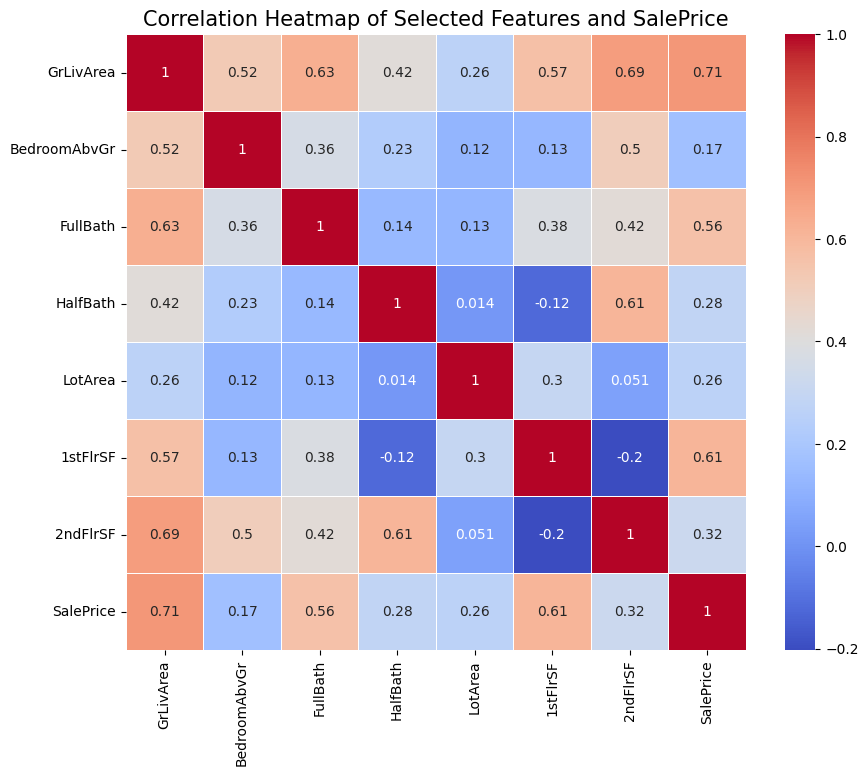

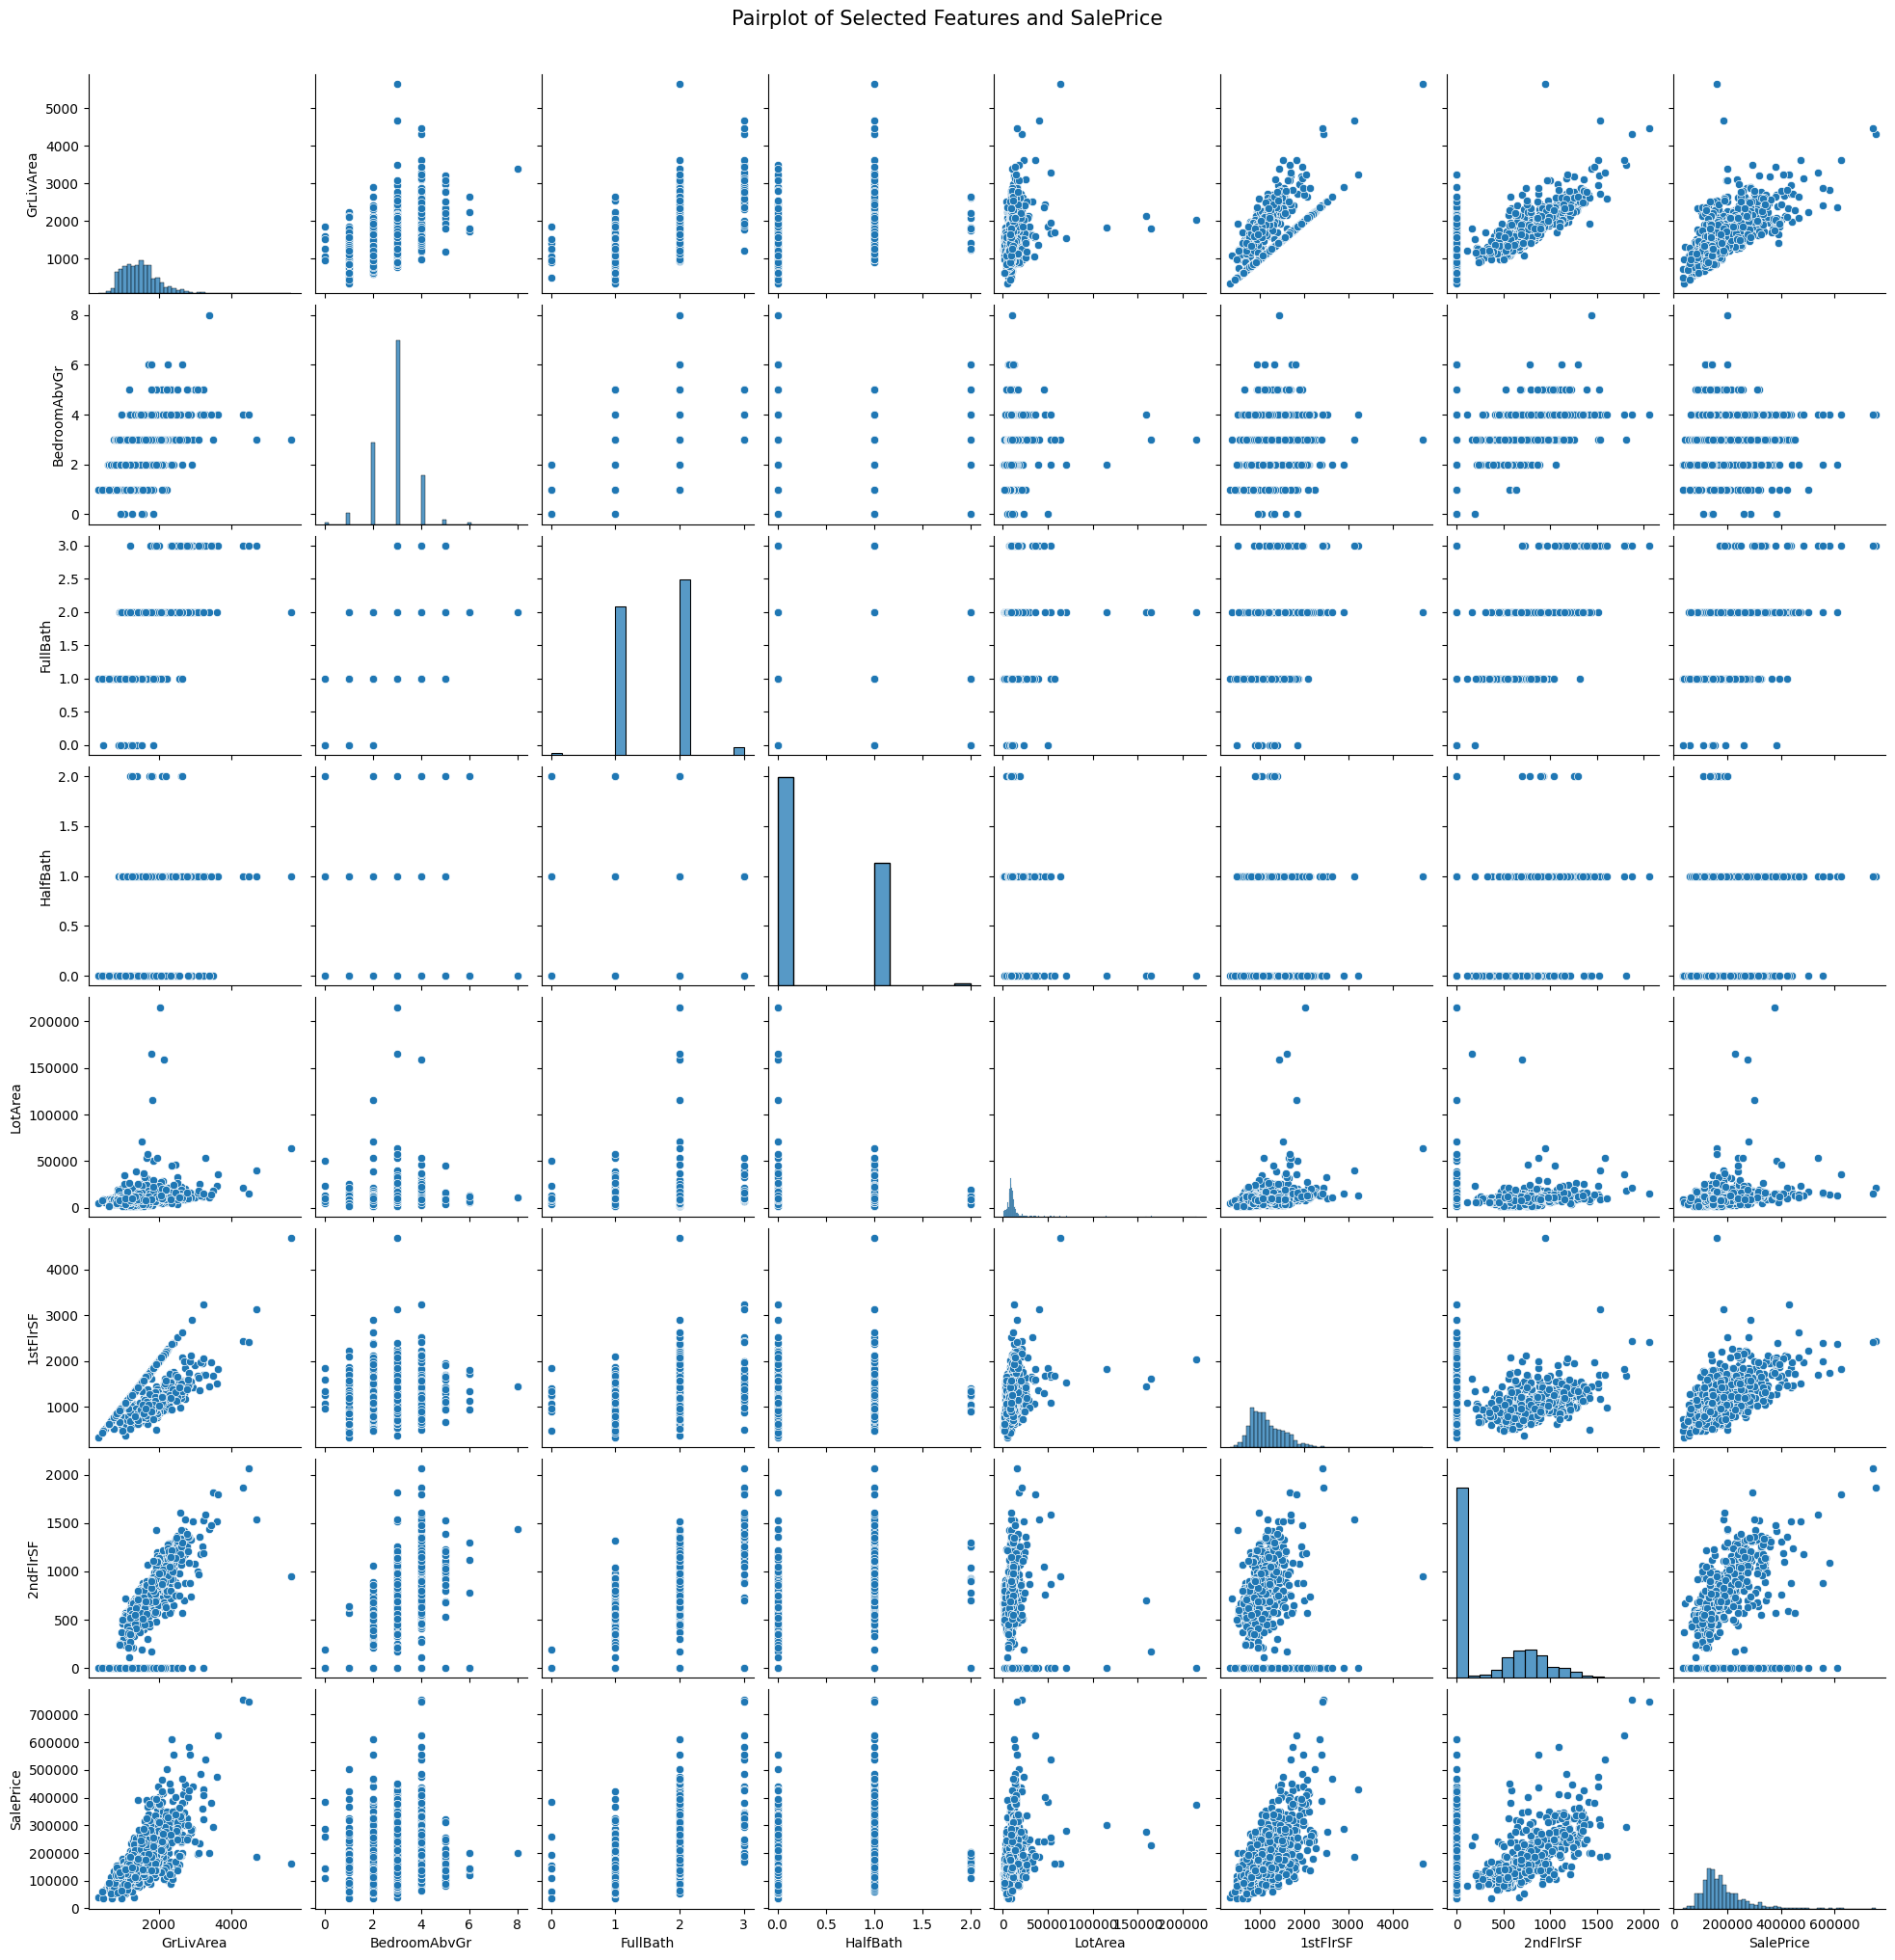

In [ ]:
file_path = '/content/train.csv'  # Update this path to the location of your file
data = pd.read_csv(file_path)

relevant_columns = ['GrLivArea', 'BedroomAbvGr', 'FullBath', 'HalfBath', 'LotArea', '1stFlrSF', '2ndFlrSF', 'SalePrice']
selected_data = data[relevant_columns]
corr_matrix = selected_data.corr()

# Heatmap
plt.figure(figsize=(10, 8))  # Adjust the figure size if needed
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, annot_kws={"size": 10})  # Adjust annot_kws for font size
plt.title('Correlation Heatmap of Selected Features and SalePrice', fontsize=15)  # Adjust title font size
plt.xticks(fontsize=10)  # Adjust x-ticks font size
plt.yticks(fontsize=10)  # Adjust y-ticks font size
plt.show()

# Pairplot
sns.pairplot(selected_data)
plt.suptitle('Pairplot of Selected Features and SalePrice', y=1.02, fontsize=15)  # Adjust title font size
plt.show()


#Data Descriptions

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64
                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea 

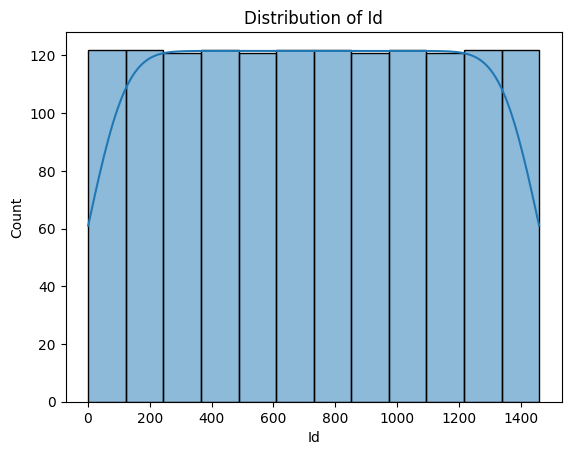

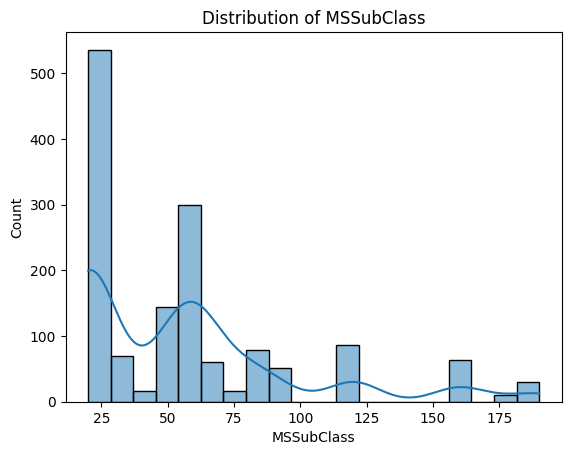

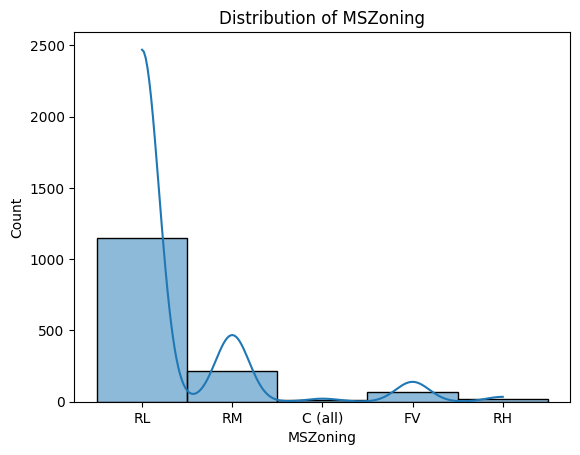

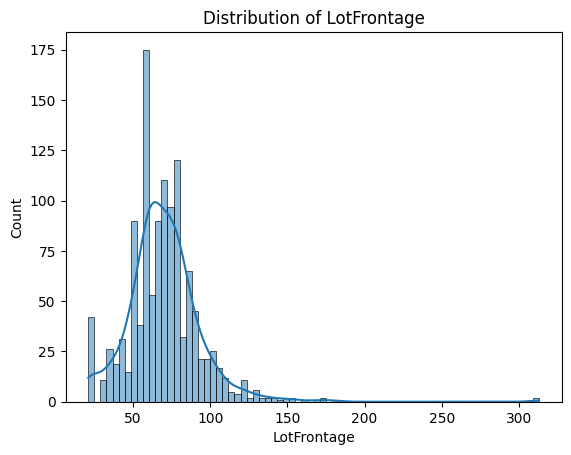

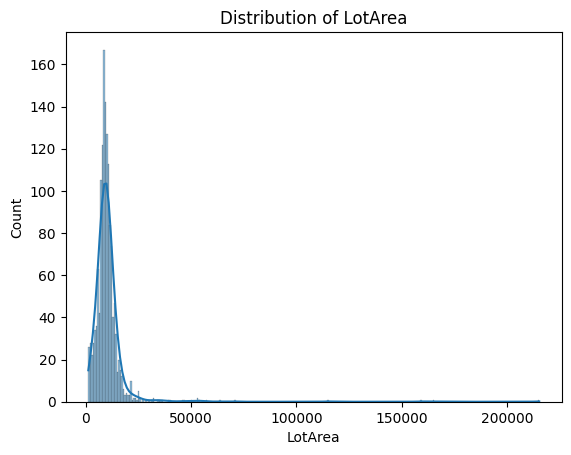

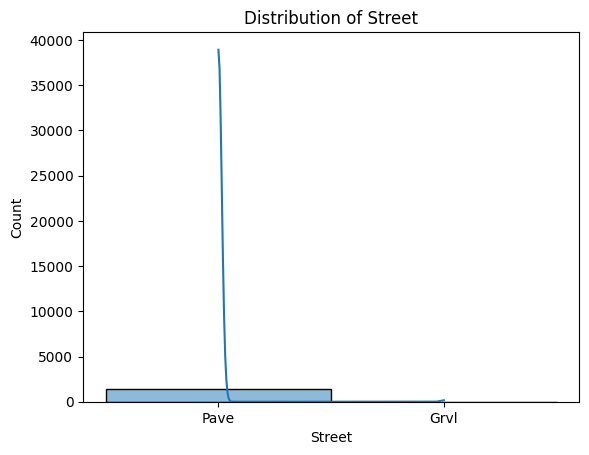

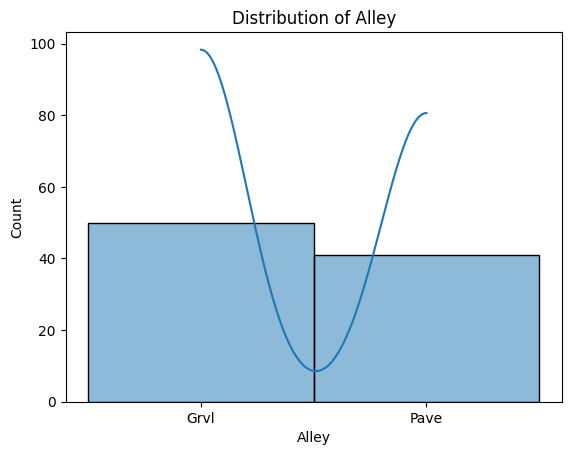

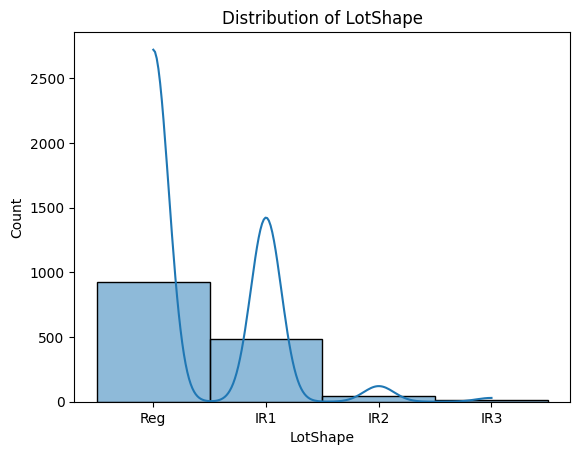

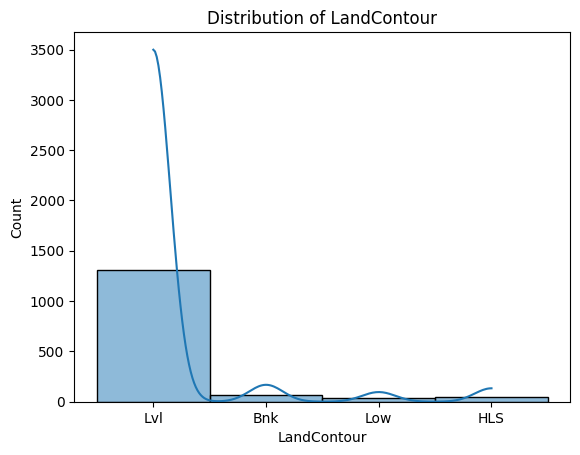

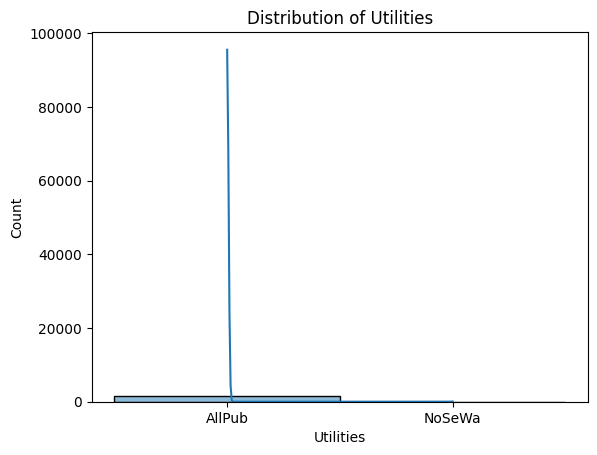

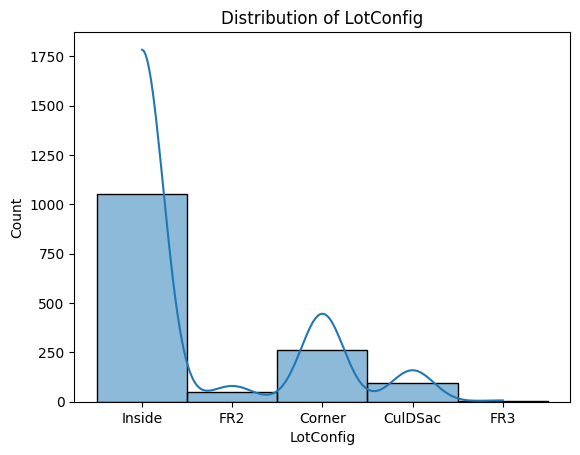

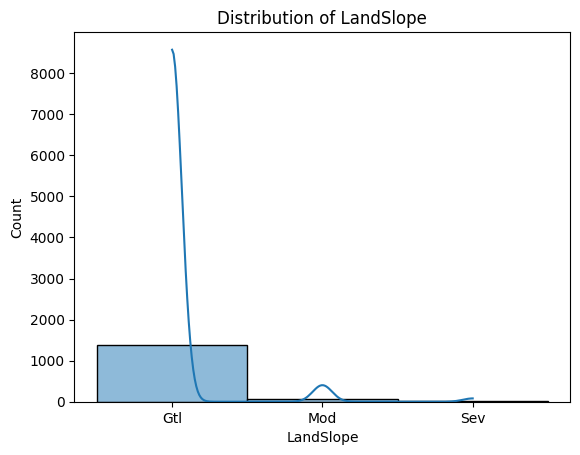

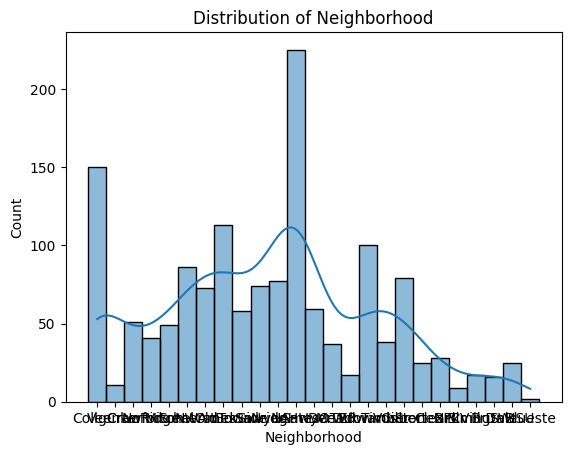

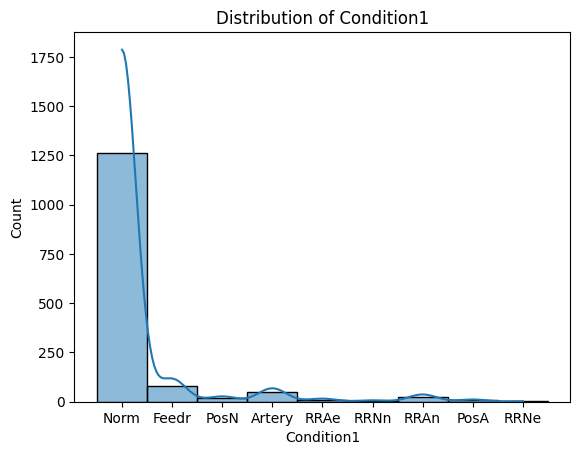

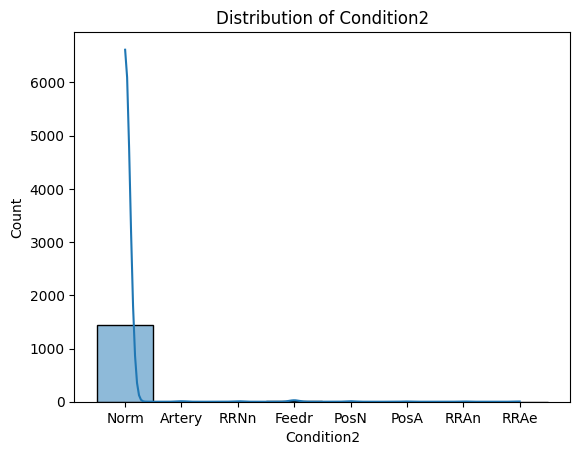

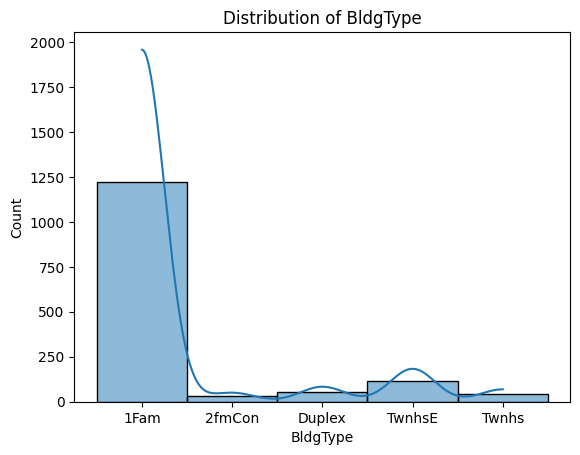

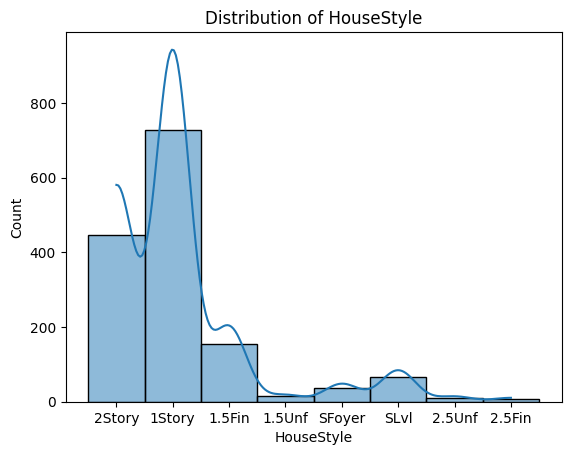

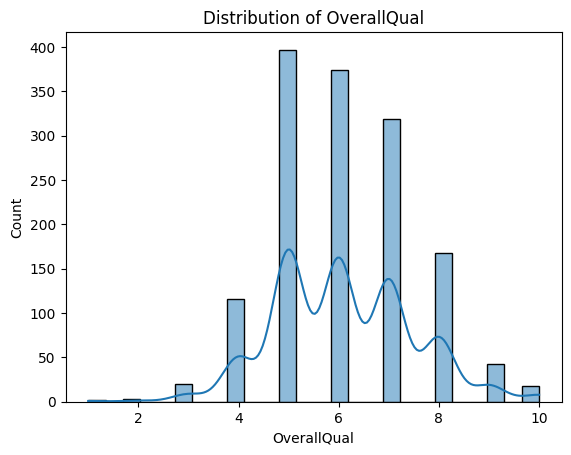

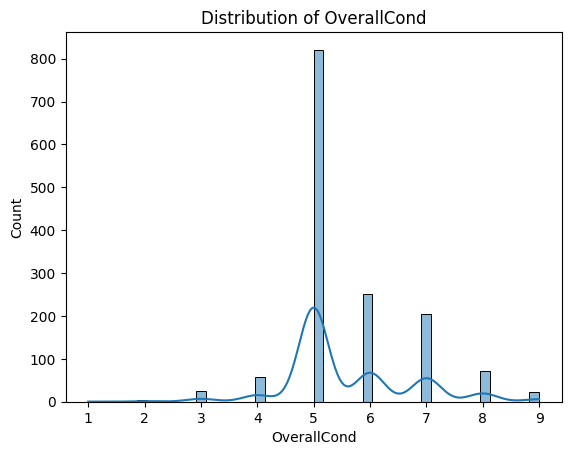

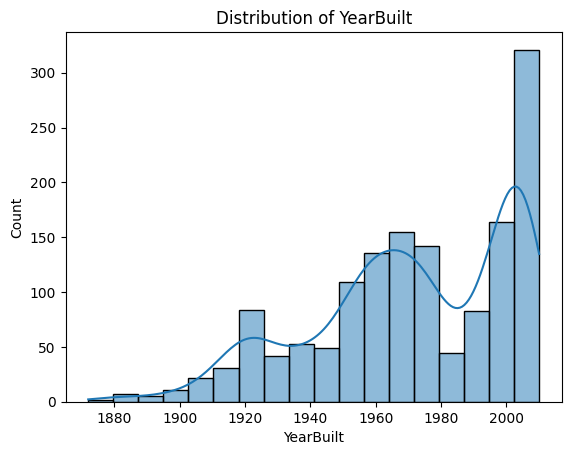

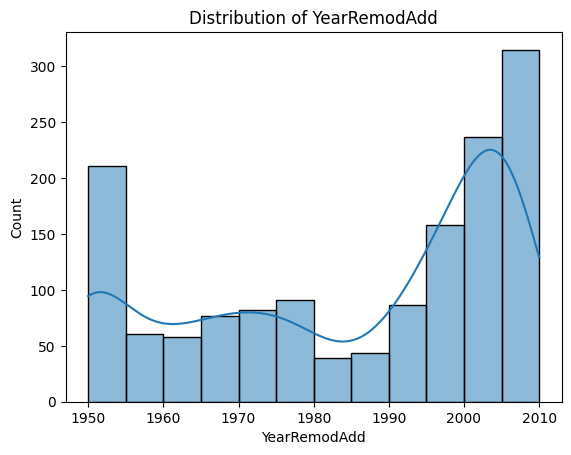

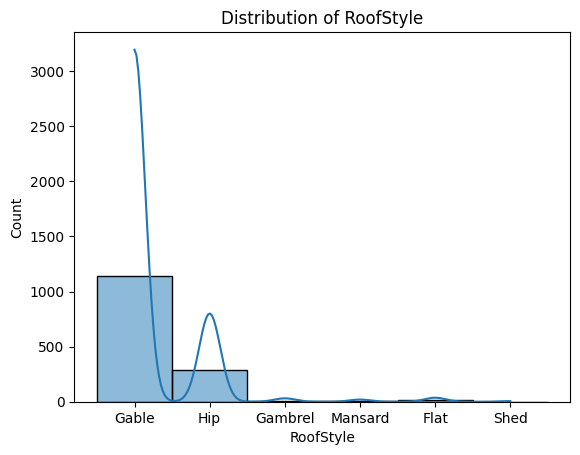

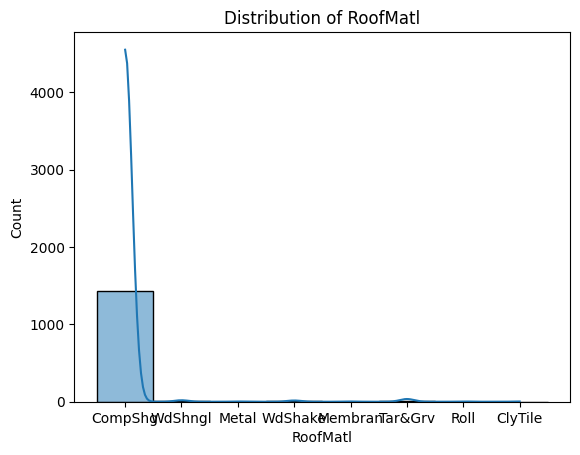

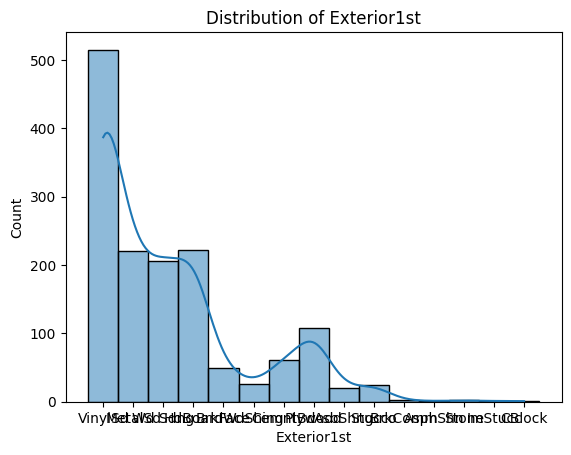

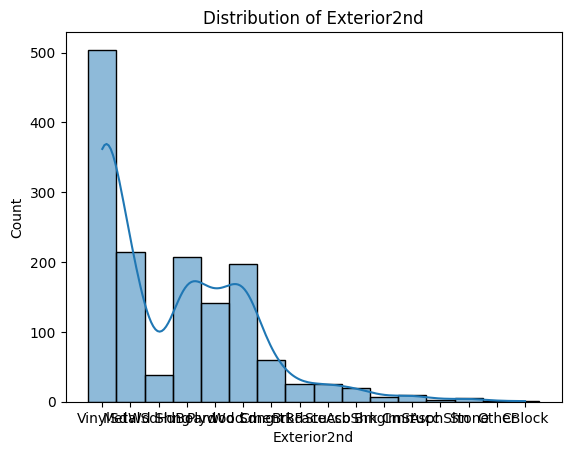

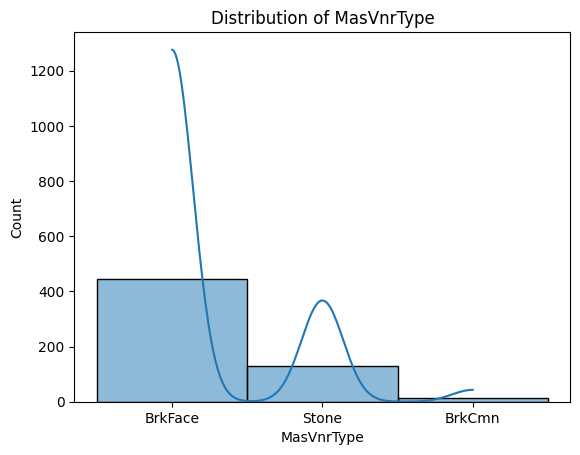

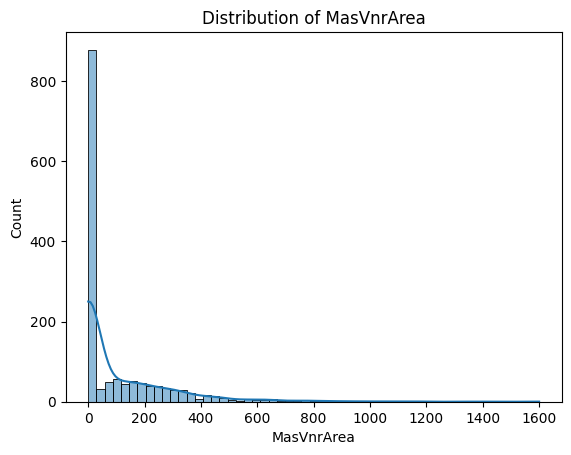

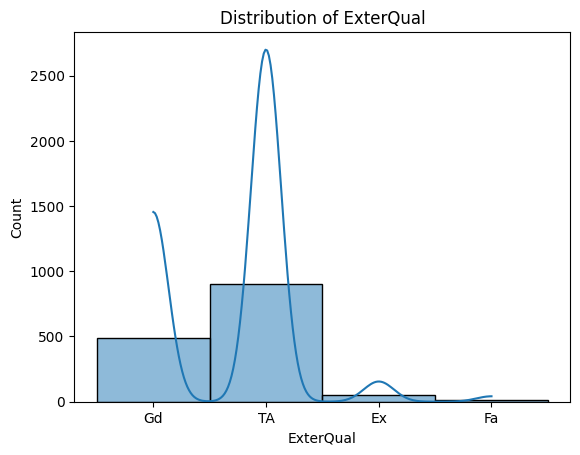

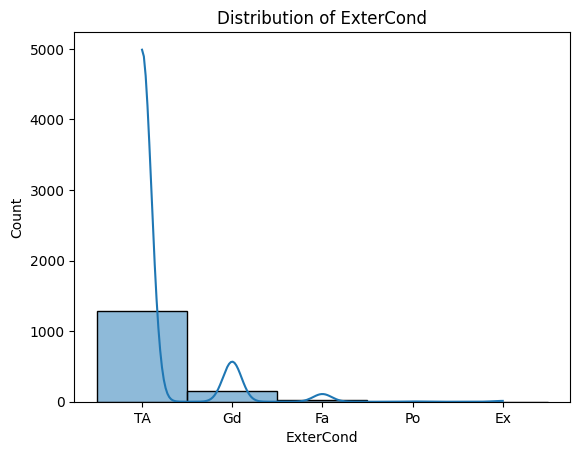

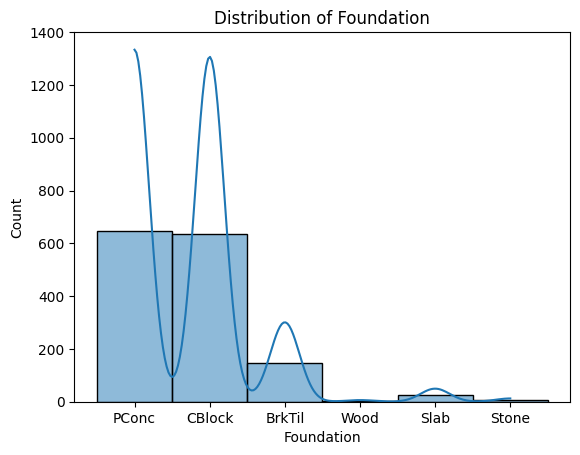

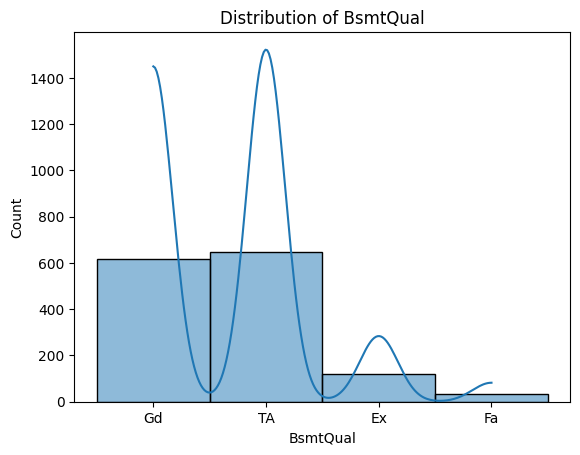

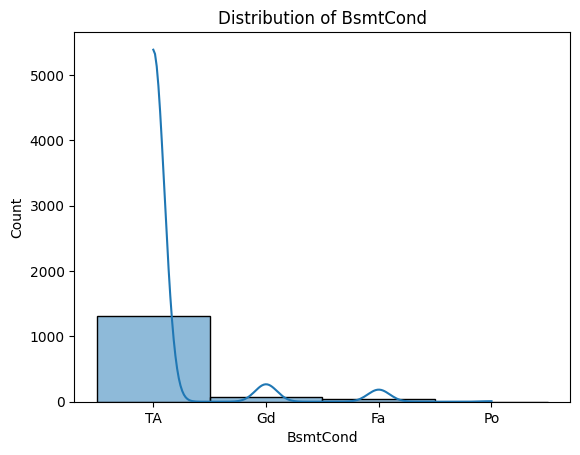

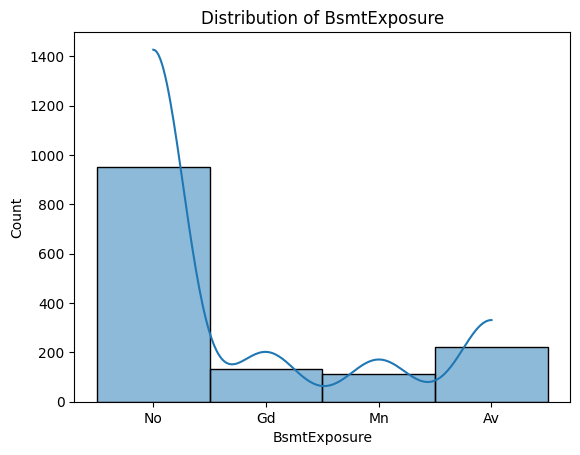

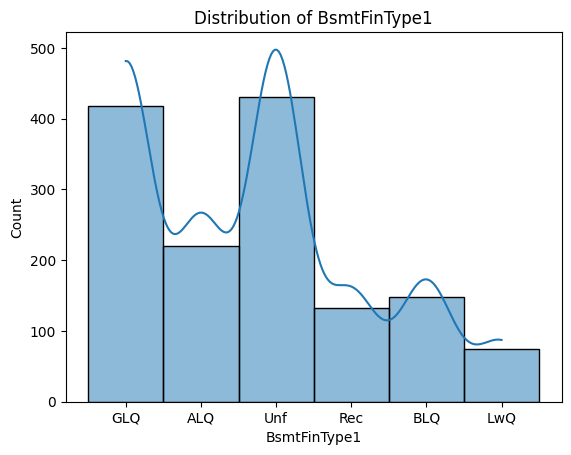

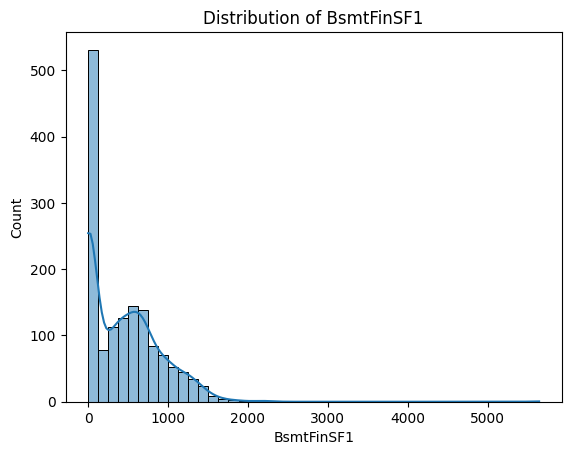

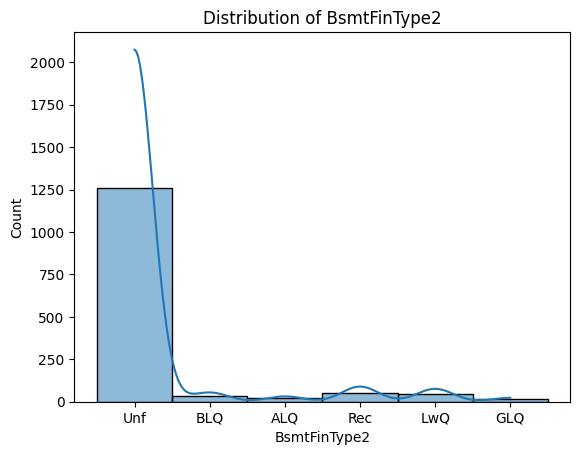

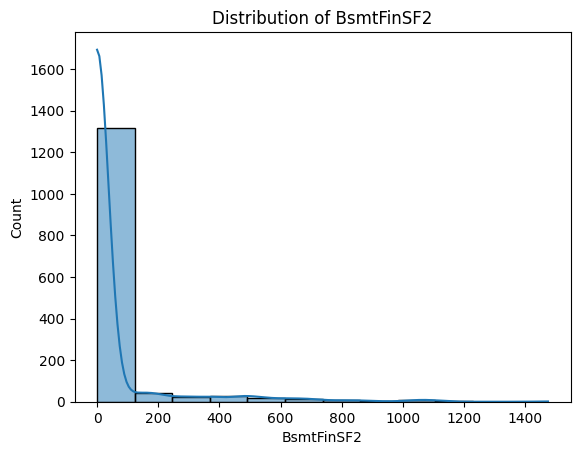

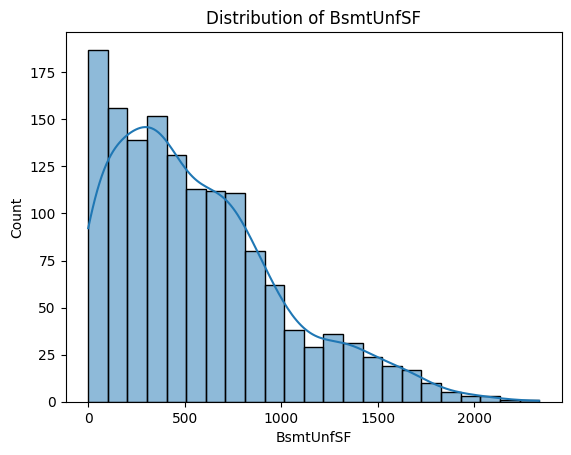

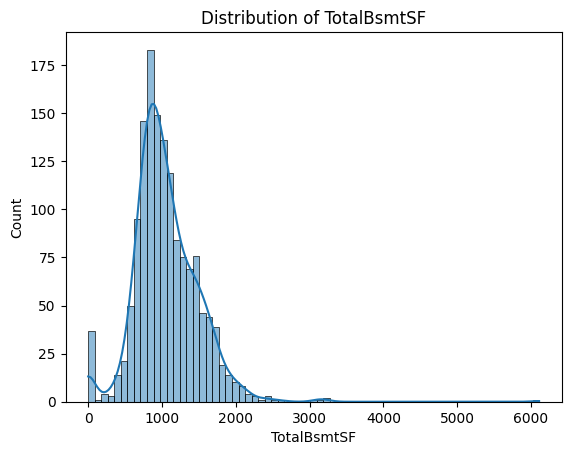

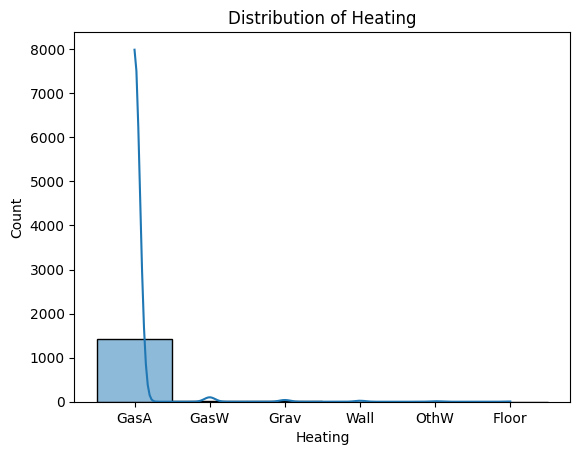

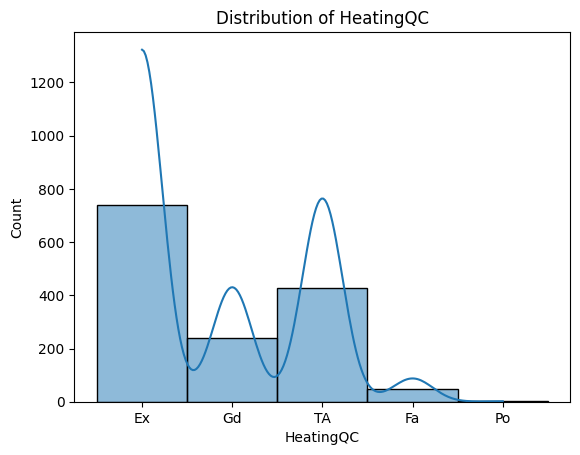

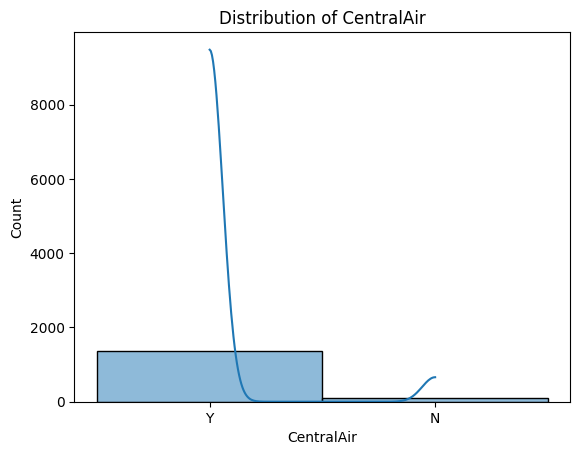

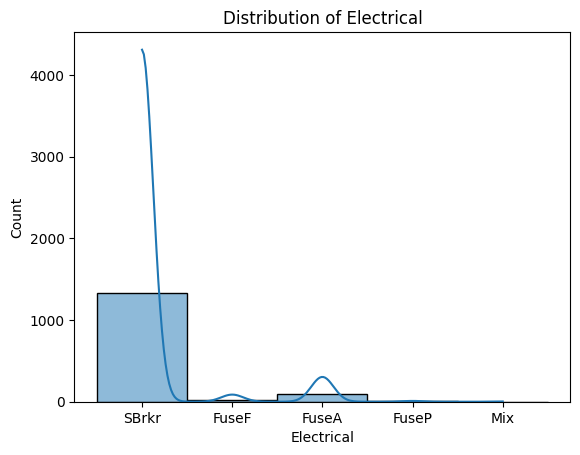

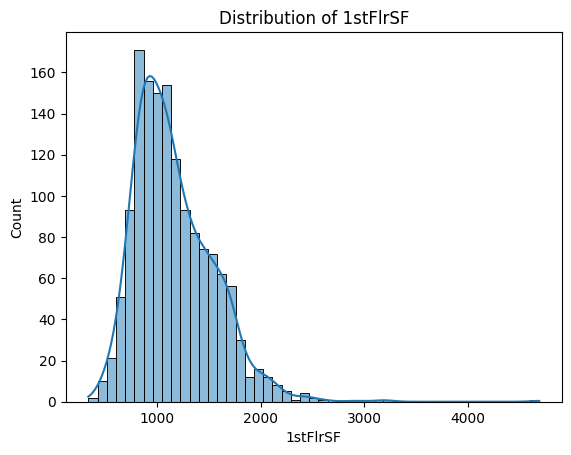

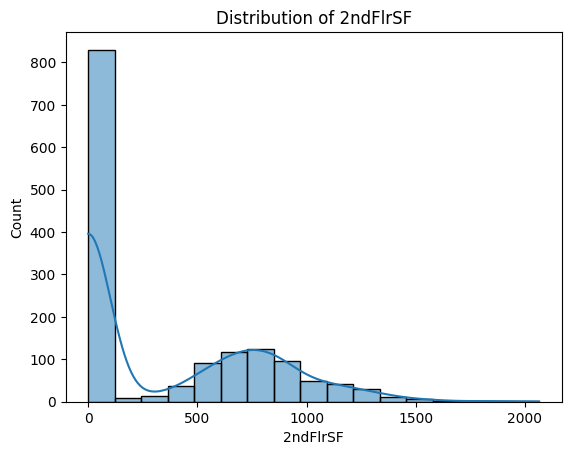

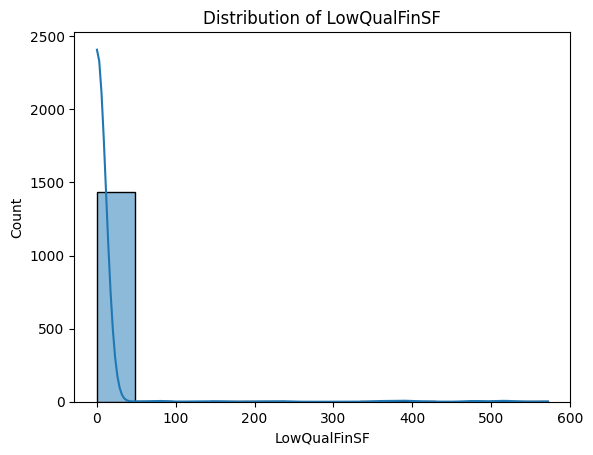

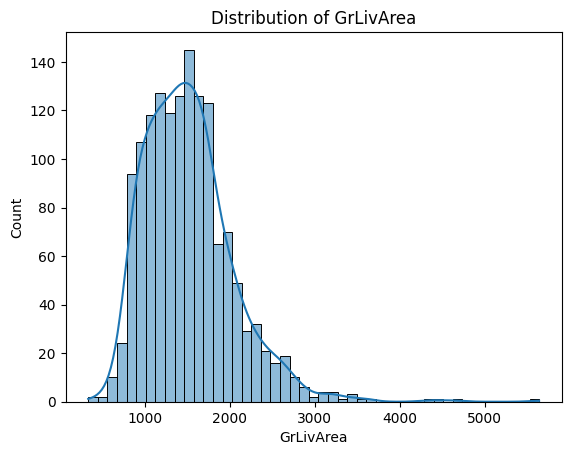

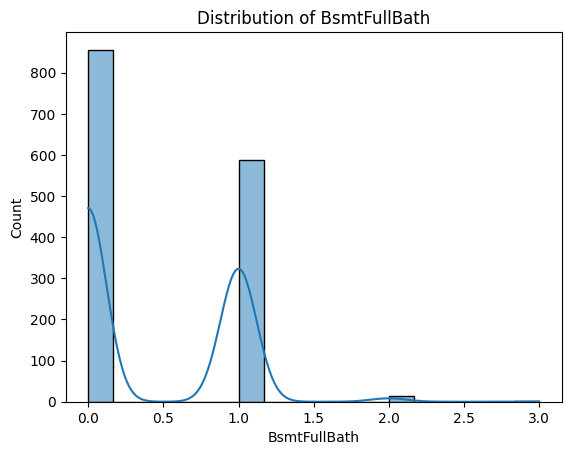

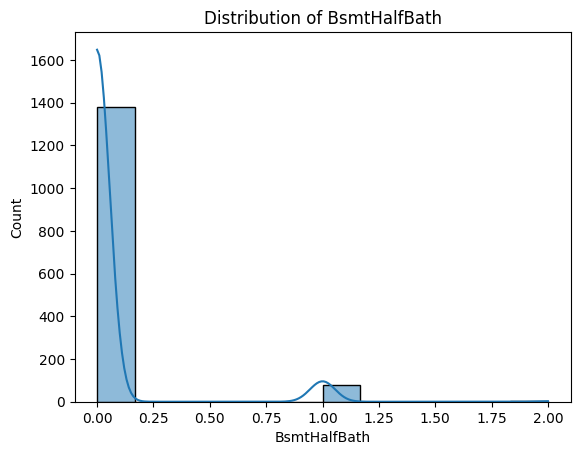

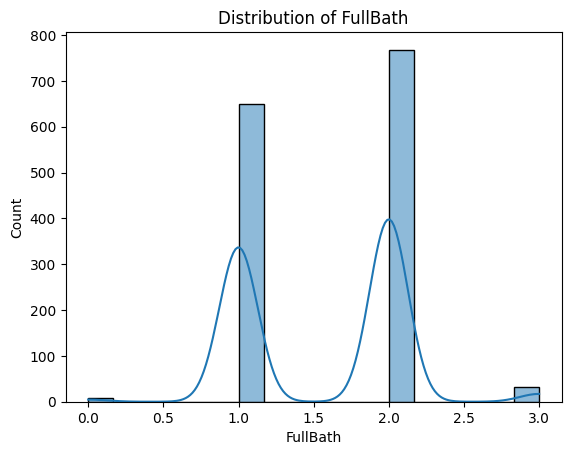

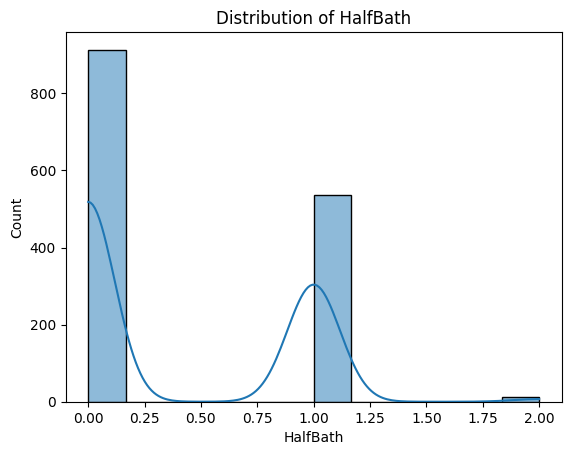

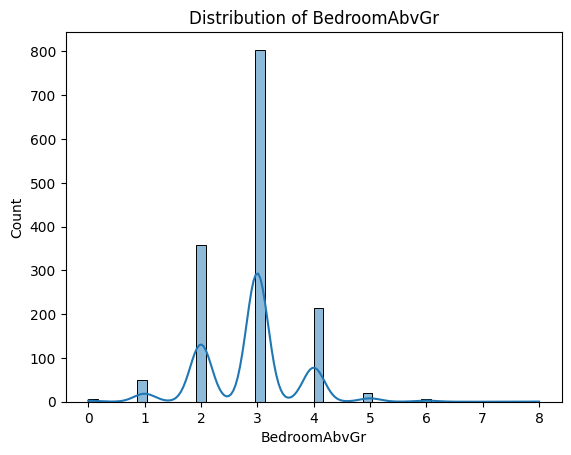

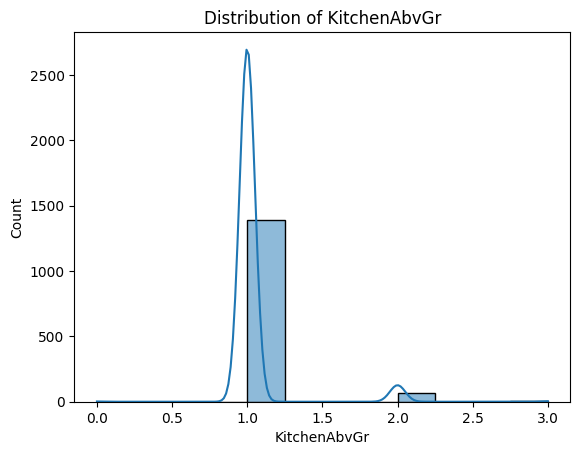

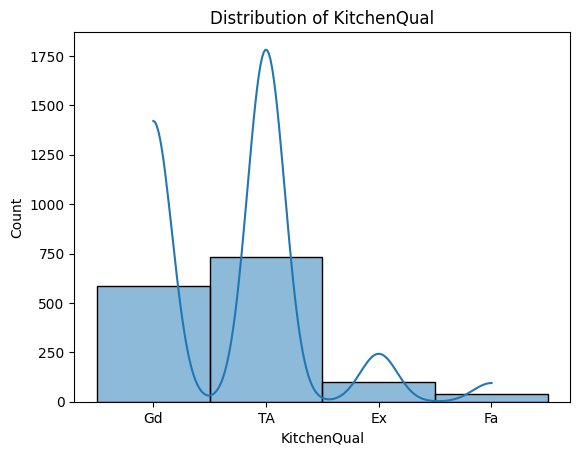

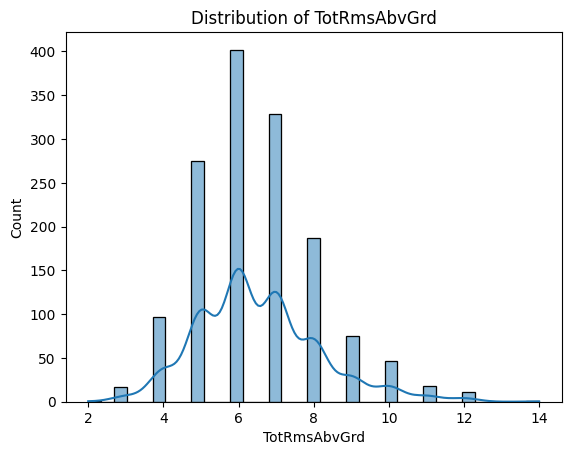

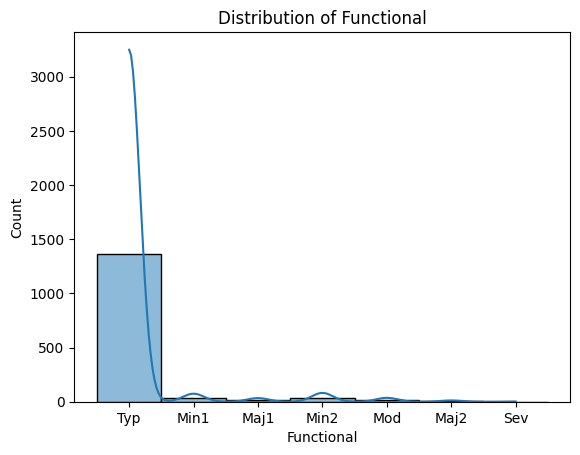

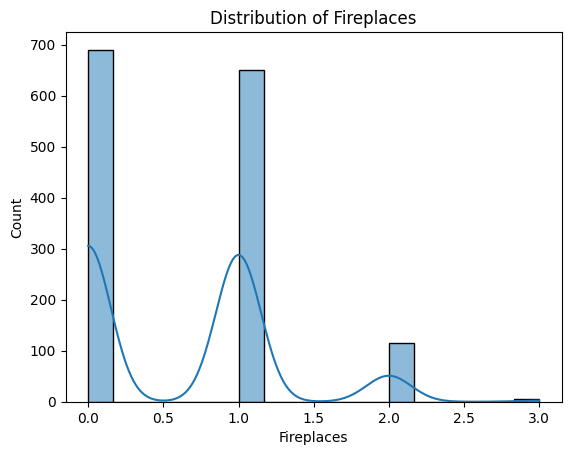

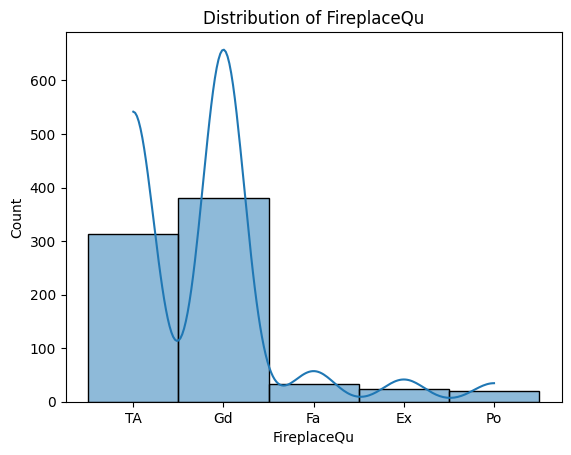

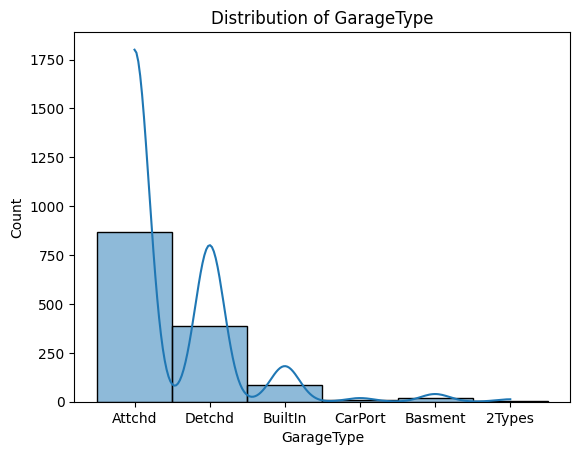

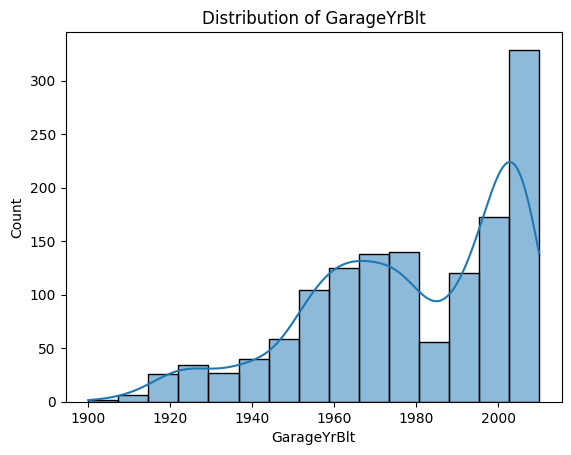

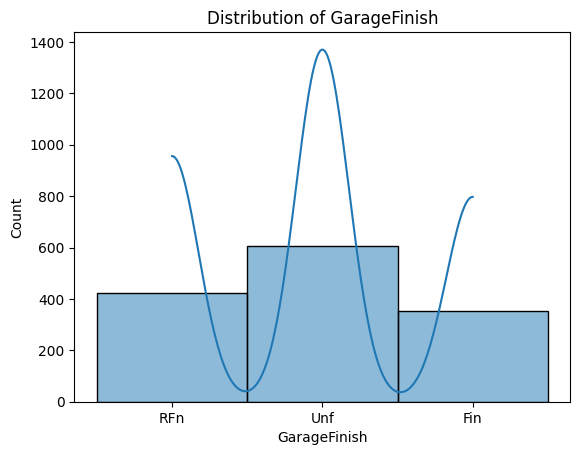

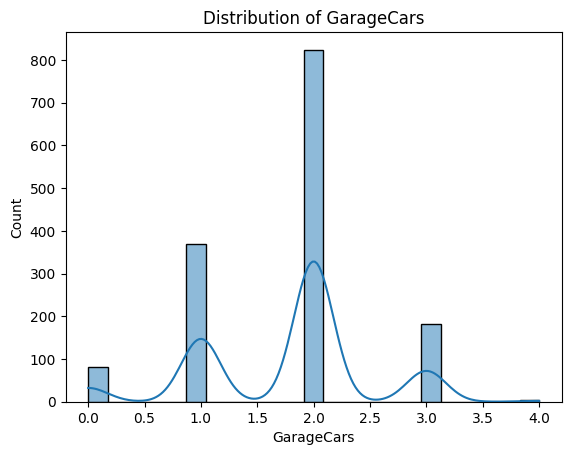

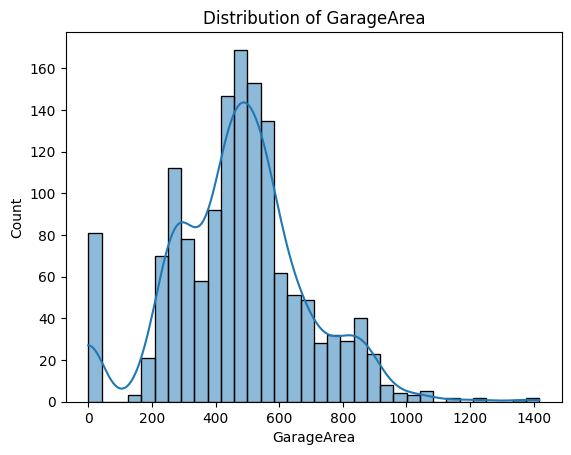

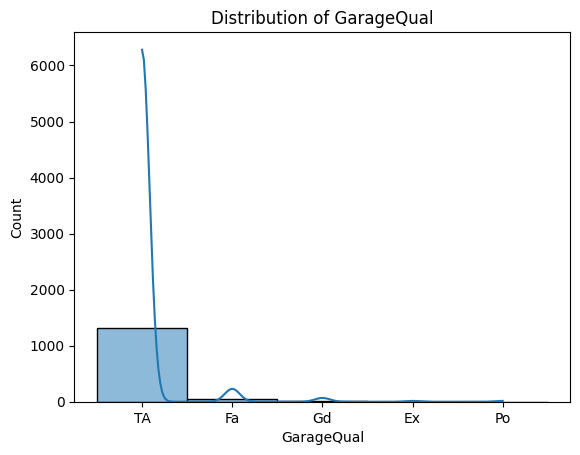

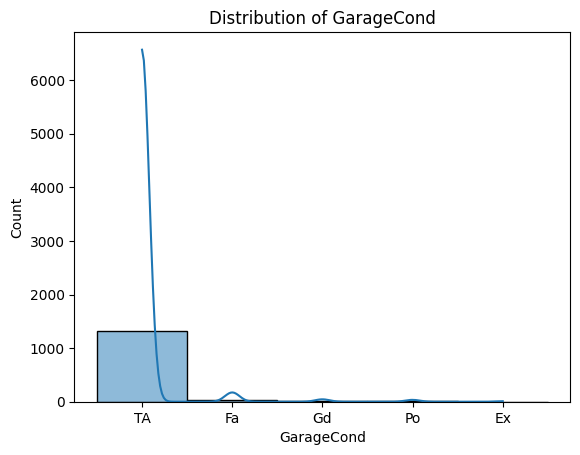

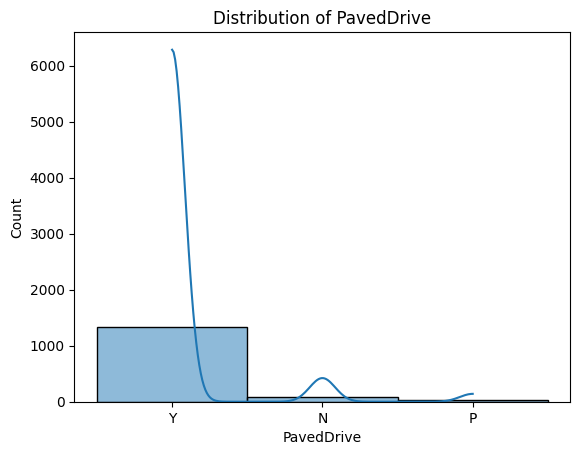

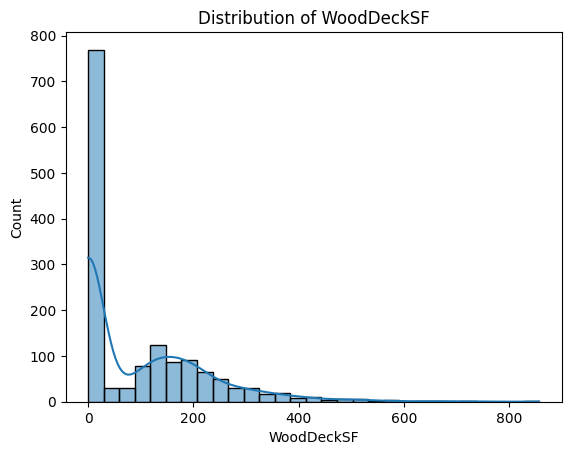

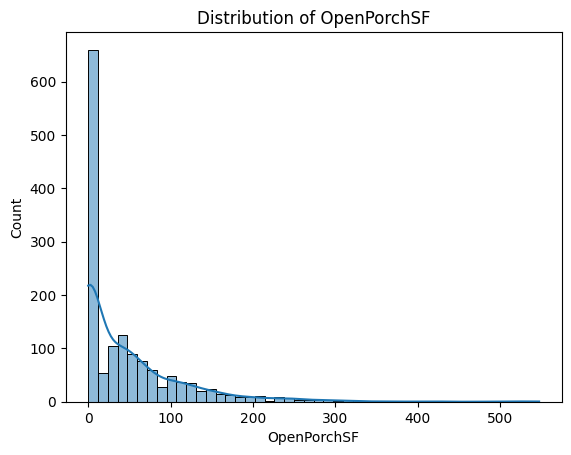

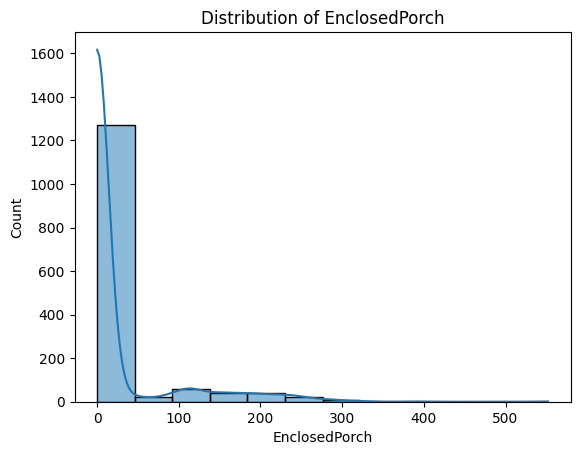

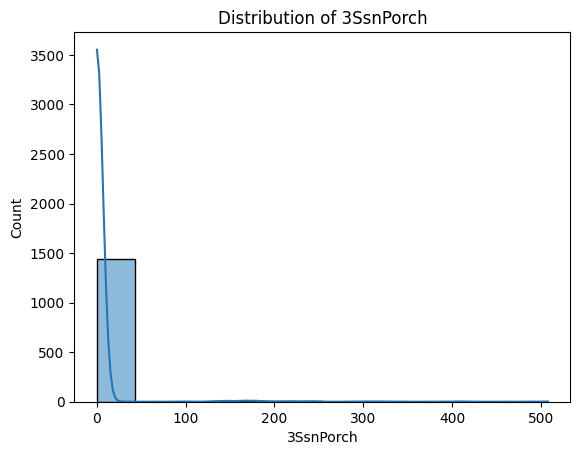

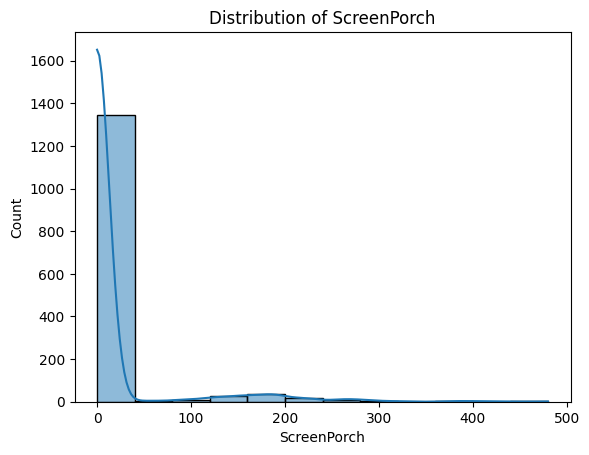

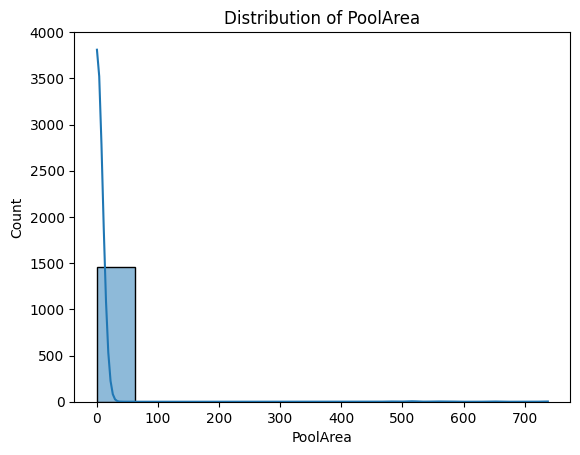

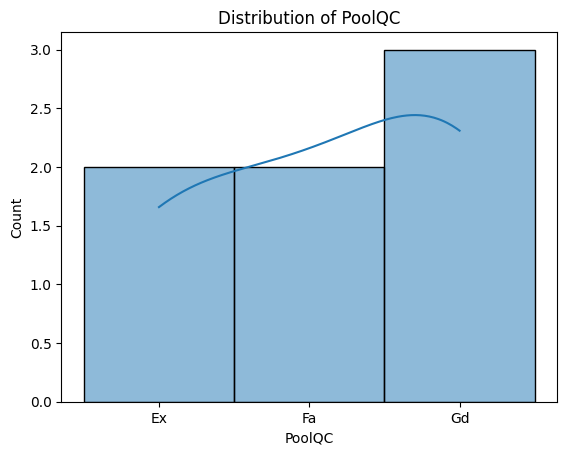

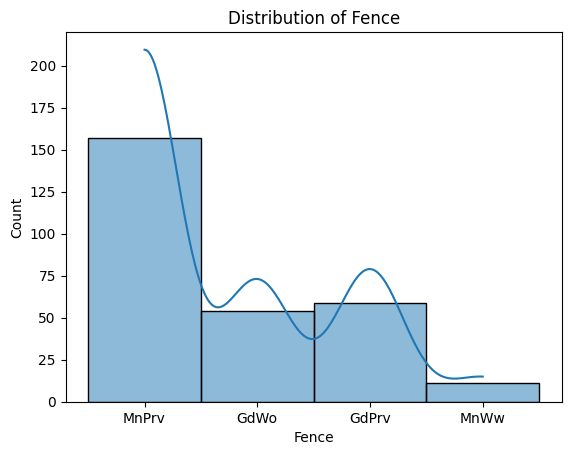

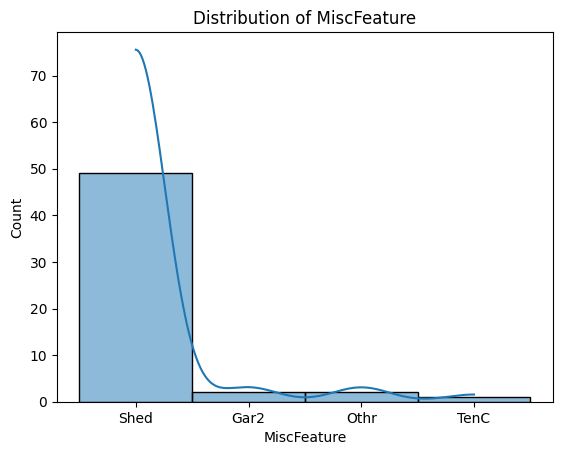

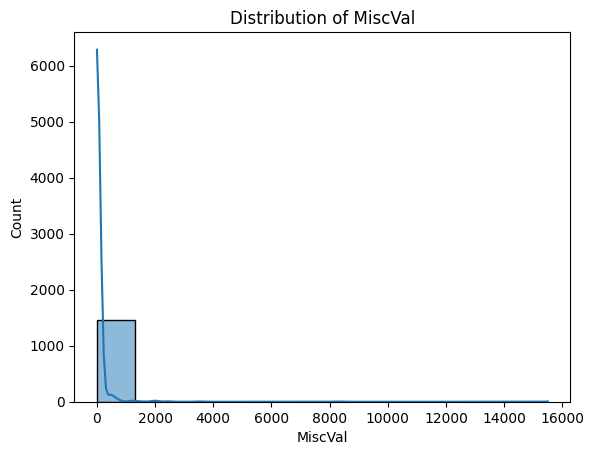

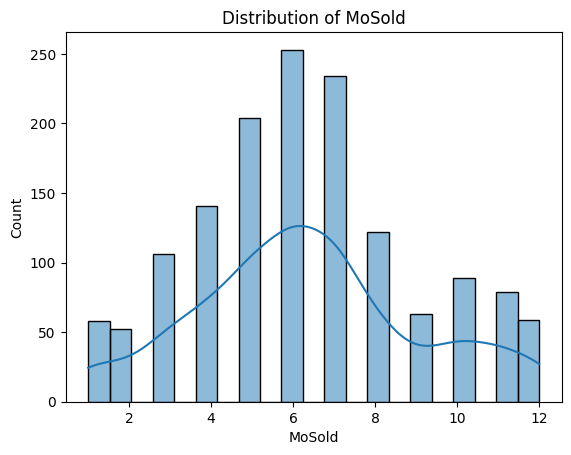

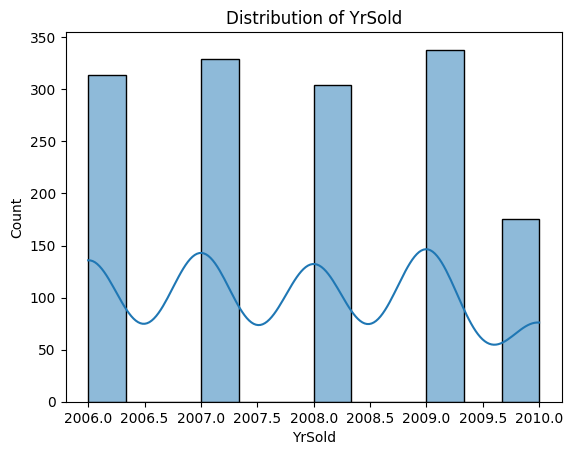

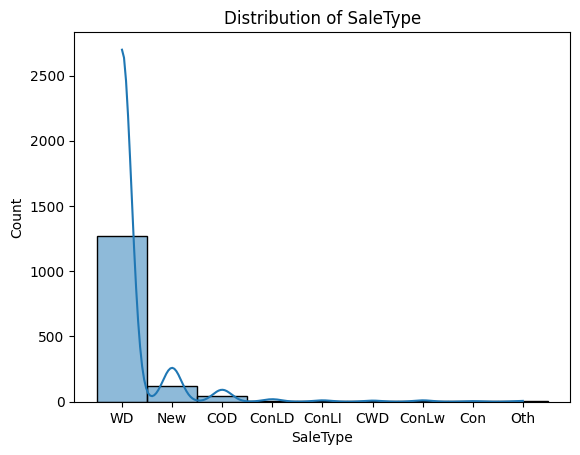

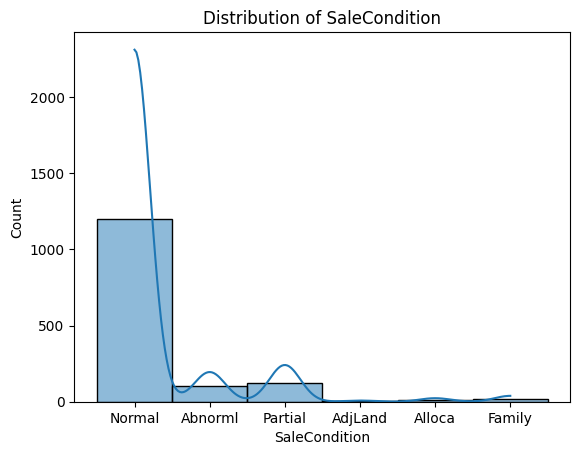

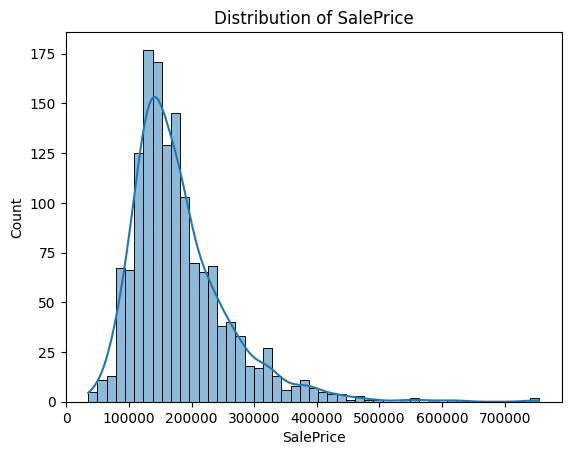

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the training dataset
training_data_path = '/content/train.csv'
training_data = pd.read_csv(training_data_path)

# Check for missing values
print(training_data.isnull().sum())

# Summary statistics
print(training_data.describe())

# Visualize distributions
for column in training_data.columns:
    plt.figure()
    sns.histplot(training_data[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()


#Outlier detection

In [4]:
import numpy as np

# Calculate the residuals
residuals = y_train - y_train_pred

# Define a threshold for identifying outliers
threshold = 3 * np.std(residuals)

# Identify the indices of outliers
outliers_indices = np.where(np.abs(residuals) > threshold)[0]

# Print the outliers
print(f"Identified {len(outliers_indices)} outliers")

# Remove the outliers
X_train_cleaned = X_train.drop(outliers_indices)
y_train_cleaned = y_train.drop(outliers_indices)


Identified 18 outliers


#Creating Polynomial Features

In [12]:
# Example of creating polynomial features
from sklearn.preprocessing import PolynomialFeatures

# Define feature columns
feature_columns = ['GrLivArea', 'BedroomAbvGr', 'FullBath', 'HalfBath', 'LotArea', '1stFlrSF', '2ndFlrSF']

# Split into features and target
X_train = training_data[feature_columns]
y_train = training_data['SalePrice']

# Create polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)


#Model Training and Evaluation

In [13]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Ridge regression
ridge_param_grid = {'alpha': [0.1, 1.0, 10.0, 100.0]}
ridge = Ridge()
ridge_cv = GridSearchCV(ridge, ridge_param_grid, cv=5, scoring='r2')

# Train the Ridge model with cross-validation
ridge_cv.fit(X_train, y_train)
print(f"Best Ridge alpha: {ridge_cv.best_params_['alpha']}")
print(f"Best Ridge CV score: {ridge_cv.best_score_}")

# Define the parameter grid for Lasso regression
lasso_param_grid = {'alpha': [0.1, 1.0, 10.0, 100.0]}
lasso = Lasso()
lasso_cv = GridSearchCV(lasso, lasso_param_grid, cv=5, scoring='r2')

# Train the Lasso model with cross-validation
lasso_cv.fit(X_train, y_train)
print(f"Best Lasso alpha: {lasso_cv.best_params_['alpha']}")
print(f"Best Lasso CV score: {lasso_cv.best_score_}")

# Choose the best model
best_model = ridge_cv if ridge_cv.best_score_ > lasso_cv.best_score_ else lasso_cv

# Train the best model on the entire dataset
best_model.fit(X_train, y_train)

# Save the trained model
model_path = 'best_linear_model.pkl'
joblib.dump(best_model, model_path)
print("Best model saved successfully with joblib.")


Best Ridge alpha: 0.1
Best Ridge CV score: 0.6273972255946567


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.393e+12, tolerance: 7.592e+08
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.318e+12, tolerance: 7.288e+08
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.322e+12, tolerance: 6.990e

Best Lasso alpha: 0.1
Best Lasso CV score: 0.6274742419413697


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.397e+12, tolerance: 7.706e+08
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.149e+12, tolerance: 7.249e+08
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.393e+12, tolerance: 7.592e

Best model saved successfully with joblib.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.652e+12, tolerance: 9.208e+08
  model = cd_fast.enet_coordinate_descent(


#Residual Visualization

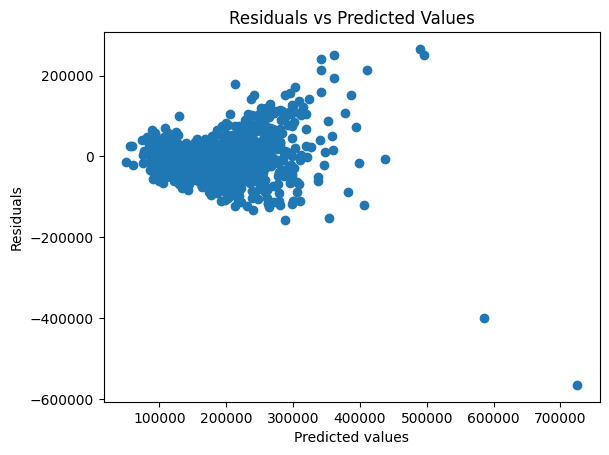

In [3]:
import matplotlib.pyplot as plt

# Predict on the training data
y_train_pred = pipeline.predict(X_train)

# Calculate residuals
residuals = y_train - y_train_pred

# Plot residuals
plt.scatter(y_train_pred, residuals)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()


#Testing on unseen data and Comparison

In [15]:
import pandas as pd
import joblib
from sklearn.metrics import mean_squared_error, r2_score

# Load the linear regression model from the joblib file
model_path = '/content/best_linear_model.pkl'
try:
    model = joblib.load(model_path)
except Exception as e:
    print(f"Error loading the model: {e}")

# Load the dataset for predictions
data_path = '/content/test.csv'
data = pd.read_csv(data_path)

# Ensure the dataset has the same feature columns used for training
feature_columns = ['GrLivArea', 'BedroomAbvGr', 'FullBath', 'HalfBath', 'LotArea', '1stFlrSF', '2ndFlrSF']  # Update with your feature column names
X = data[feature_columns]

# Make predictions using the model
predictions = model.predict(X)

# Save the predicted values to a CSV file
predictions_df = pd.DataFrame(predictions, columns=['Predicted'])
predictions_df.to_csv('predicted_values.csv', index=False)

# Load the actual values dataset
actual_values_path = '/content/sample_submission.csv'
actual_values = pd.read_csv(actual_values_path)

# Assuming the actual values dataset has a column named 'actual'
y_true = actual_values['SalePrice']  # Update with your actual value column name

# Compare predicted values with actual values and print regression metrics
mse = mean_squared_error(y_true, predictions)
r2 = r2_score(y_true, predictions)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 3380046919.329578
R-squared: -11.396230344787801
